# Libraries

install all Libraries

pip install opencv-python numpy pandas matplotlib seaborn scikit-learn scikit-image


In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from skimage.feature import local_binary_pattern
from skimage.feature import hog
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset & Preprocessing

In [2]:
data_dir = "/Users/dani/Desktop/machine-learning-project-ml-team-3/MS" 

folders = {
    "Healthy": ["Control Axial_crop", "Control Saggital_crop"],
    "MS": ["MS Axial_crop", "MS Saggital_crop"]
}

X = []
y = []

img_size = (224, 224)

for label, subfolders in folders.items():
    for subfolder in subfolders:
        folder_path = os.path.join(data_dir, subfolder)
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, img_size)
                X.append(img.flatten())
                y.append(0 if label == "Healthy" else 1)
            except:
                continue

X = np.array(X)
y = np.array(y)

print("Shape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (3427, 50176)
Shape y: (3427,)


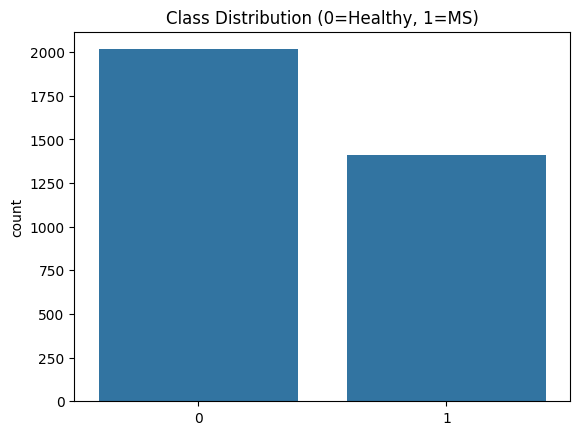

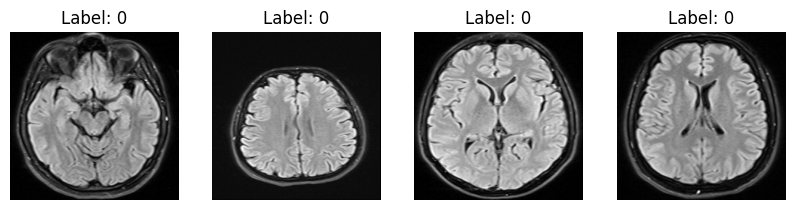

In [3]:
sns.countplot(x=y)
plt.title("Class Distribution (0=Healthy, 1=MS)")
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(10, 4))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(224,224), cmap="gray")
    ax.set_title("Label: " + str(y[i]))
    ax.axis("off")
plt.show()


# Feature Engineering


In [4]:
def extract_lbp_features(images, P=8, R=1):
    features = []
    for img in images:
        img_reshaped = img.reshape(224,224)
        lbp = local_binary_pattern(img_reshaped, P, R, method="uniform")
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P+3), range=(0, P+2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        features.append(hist)
    return np.array(features)

X_lbp = extract_lbp_features(X)
print("LBP Features Shape:", X_lbp.shape)


LBP Features Shape: (3427, 10)


In [5]:
def extract_hog_features(images):
    features = []
    for img in images:
        img_reshaped = img.reshape(224,224)
        hog_features, _ = hog(img_reshaped, pixels_per_cell=(16, 16),
                              cells_per_block=(2, 2), visualize=True, feature_vector=True)
        features.append(hog_features)
    return np.array(features)

X_hog = extract_hog_features(X)
print("HOG Features Shape:", X_hog.shape)


HOG Features Shape: (3427, 6084)


In [6]:
X_features = np.hstack([X_lbp, X_hog])
print("Combined Features Shape:", X_features.shape)


Combined Features Shape: (3427, 6094)


# 1. Scaling

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)


# 2. PCA

In [8]:

pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_scaled)

print("PCA Features Shape:", X_pca.shape)

PCA Features Shape: (3427, 970)


# 3. Train/Test Split


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Cross-validation and Model

=== Cross-validation on Training Set ===

--- Fold 1 ---
Accuracy: 0.9275
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        81
           1       0.94      0.88      0.91        57

    accuracy                           0.93       138
   macro avg       0.93      0.92      0.92       138
weighted avg       0.93      0.93      0.93       138

Confusion Matrix:
 [[78  3]
 [ 7 50]]


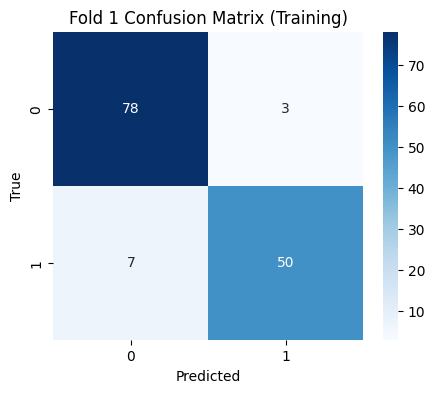


--- Fold 2 ---
Accuracy: 0.9635
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        81
           1       0.96      0.95      0.95        56

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

Confusion Matrix:
 [[79  2]
 [ 3 53]]


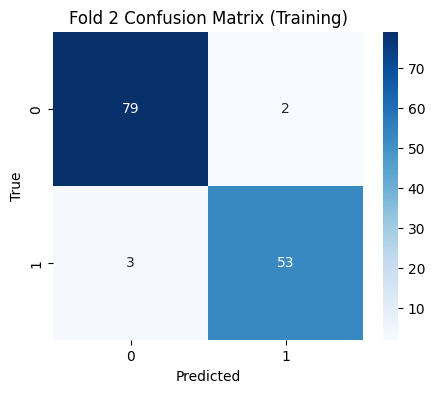


--- Fold 3 ---
Accuracy: 0.9270
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        81
           1       0.91      0.91      0.91        56

    accuracy                           0.93       137
   macro avg       0.92      0.92      0.92       137
weighted avg       0.93      0.93      0.93       137

Confusion Matrix:
 [[76  5]
 [ 5 51]]


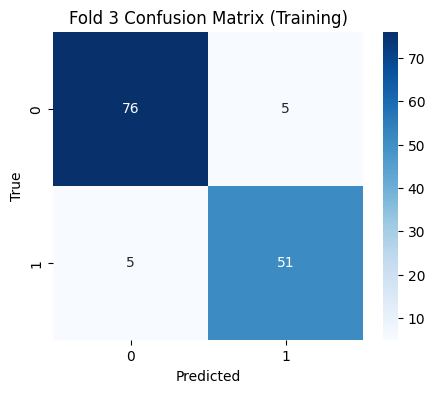


--- Fold 4 ---
Accuracy: 0.8905
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91        81
           1       0.85      0.89      0.87        56

    accuracy                           0.89       137
   macro avg       0.89      0.89      0.89       137
weighted avg       0.89      0.89      0.89       137

Confusion Matrix:
 [[72  9]
 [ 6 50]]


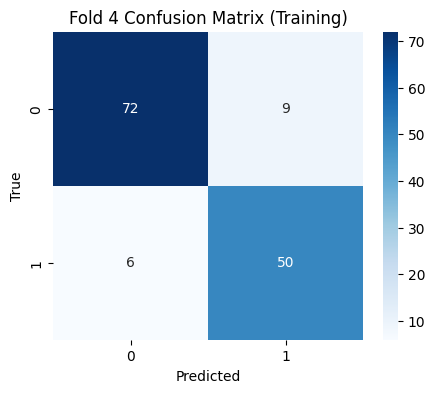


--- Fold 5 ---
Accuracy: 0.9343
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        81
           1       0.96      0.88      0.92        56

    accuracy                           0.93       137
   macro avg       0.94      0.93      0.93       137
weighted avg       0.94      0.93      0.93       137

Confusion Matrix:
 [[79  2]
 [ 7 49]]


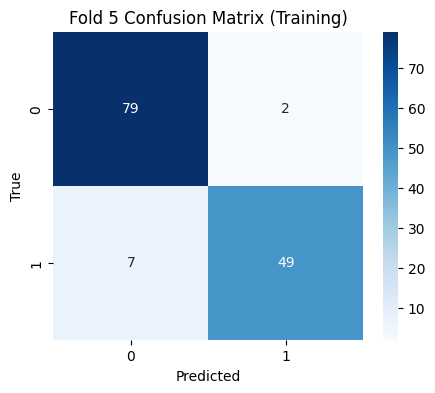


--- Fold 6 ---
Accuracy: 0.9270
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        81
           1       0.98      0.84      0.90        56

    accuracy                           0.93       137
   macro avg       0.94      0.91      0.92       137
weighted avg       0.93      0.93      0.93       137

Confusion Matrix:
 [[80  1]
 [ 9 47]]


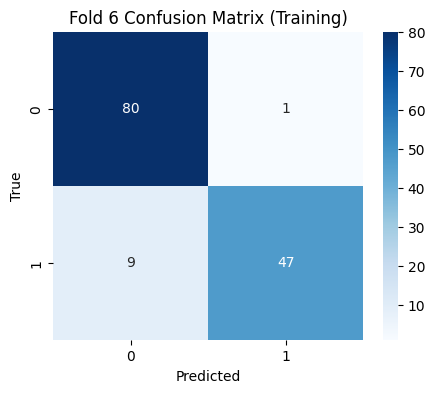


--- Fold 7 ---
Accuracy: 0.9197
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        81
           1       0.94      0.86      0.90        56

    accuracy                           0.92       137
   macro avg       0.92      0.91      0.92       137
weighted avg       0.92      0.92      0.92       137

Confusion Matrix:
 [[78  3]
 [ 8 48]]


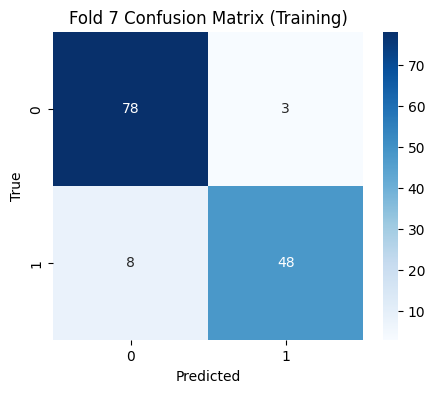


--- Fold 8 ---
Accuracy: 0.9416
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        81
           1       0.94      0.91      0.93        56

    accuracy                           0.94       137
   macro avg       0.94      0.94      0.94       137
weighted avg       0.94      0.94      0.94       137

Confusion Matrix:
 [[78  3]
 [ 5 51]]


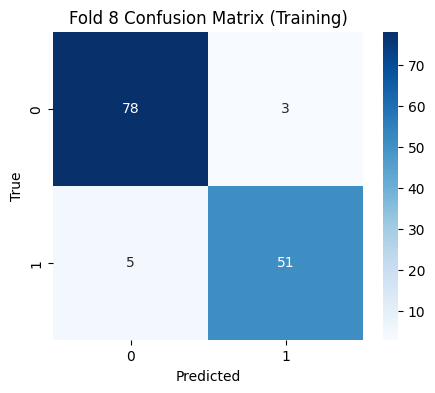


--- Fold 9 ---
Accuracy: 0.9270
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        81
           1       1.00      0.82      0.90        56

    accuracy                           0.93       137
   macro avg       0.95      0.91      0.92       137
weighted avg       0.94      0.93      0.93       137

Confusion Matrix:
 [[81  0]
 [10 46]]


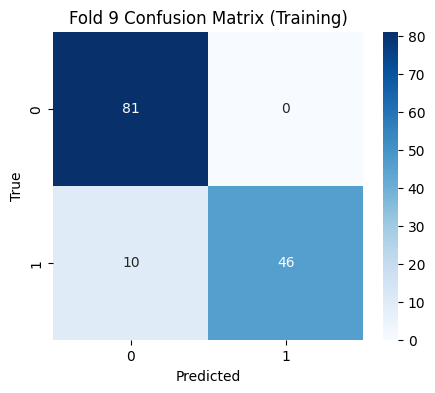


--- Fold 10 ---
Accuracy: 0.9197
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93        81
           1       0.91      0.89      0.90        56

    accuracy                           0.92       137
   macro avg       0.92      0.92      0.92       137
weighted avg       0.92      0.92      0.92       137

Confusion Matrix:
 [[76  5]
 [ 6 50]]


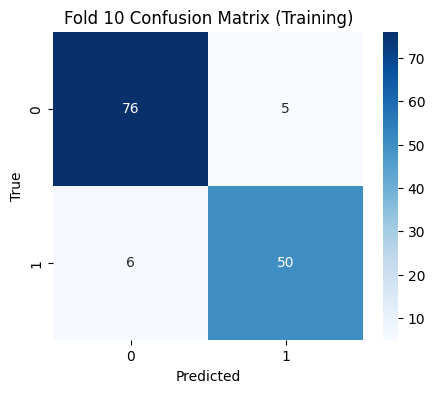


--- Fold 11 ---
Accuracy: 0.9343
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        81
           1       0.91      0.93      0.92        56

    accuracy                           0.93       137
   macro avg       0.93      0.93      0.93       137
weighted avg       0.93      0.93      0.93       137

Confusion Matrix:
 [[76  5]
 [ 4 52]]


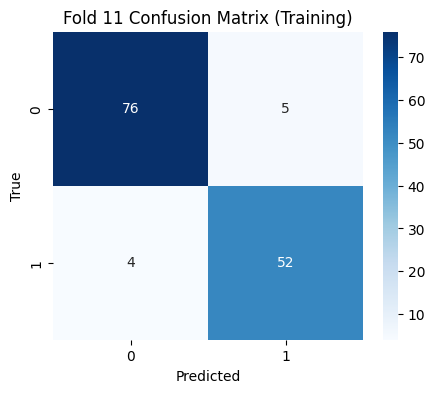


--- Fold 12 ---
Accuracy: 0.9489
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96        81
           1       0.95      0.93      0.94        56

    accuracy                           0.95       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137

Confusion Matrix:
 [[78  3]
 [ 4 52]]


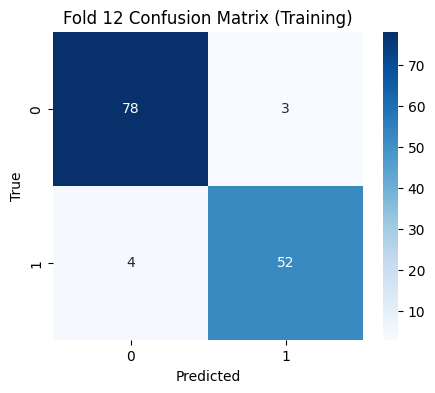


--- Fold 13 ---
Accuracy: 0.9416
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        80
           1       0.93      0.93      0.93        57

    accuracy                           0.94       137
   macro avg       0.94      0.94      0.94       137
weighted avg       0.94      0.94      0.94       137

Confusion Matrix:
 [[76  4]
 [ 4 53]]


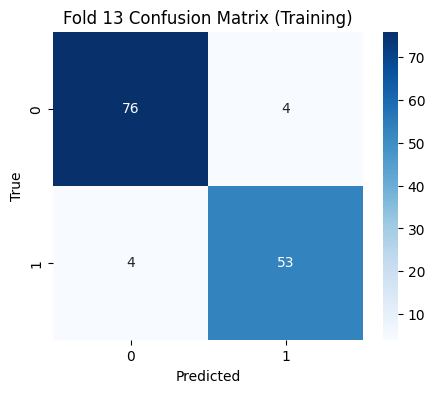


--- Fold 14 ---
Accuracy: 0.9781
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        80
           1       0.98      0.96      0.97        57

    accuracy                           0.98       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137

Confusion Matrix:
 [[79  1]
 [ 2 55]]


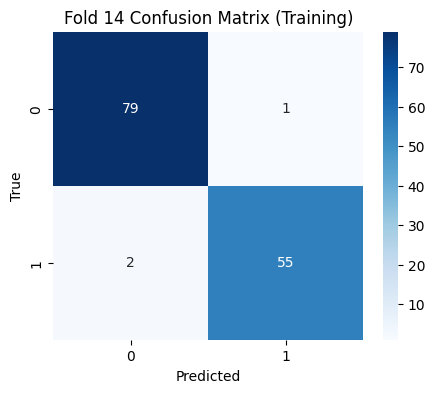


--- Fold 15 ---
Accuracy: 0.9051
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        80
           1       1.00      0.77      0.87        57

    accuracy                           0.91       137
   macro avg       0.93      0.89      0.90       137
weighted avg       0.92      0.91      0.90       137

Confusion Matrix:
 [[80  0]
 [13 44]]


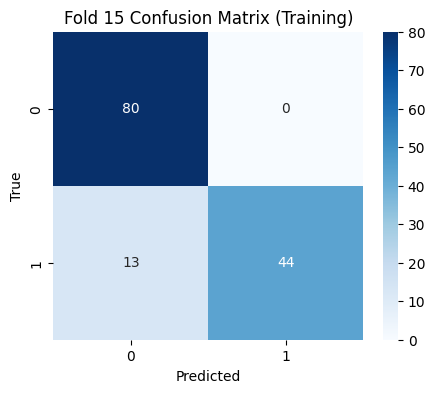


--- Fold 16 ---
Accuracy: 0.9197
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        80
           1       0.94      0.86      0.90        57

    accuracy                           0.92       137
   macro avg       0.92      0.91      0.92       137
weighted avg       0.92      0.92      0.92       137

Confusion Matrix:
 [[77  3]
 [ 8 49]]


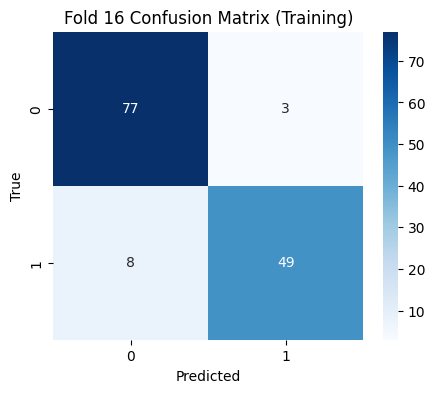


--- Fold 17 ---
Accuracy: 0.9343
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95        80
           1       0.98      0.86      0.92        57

    accuracy                           0.93       137
   macro avg       0.94      0.92      0.93       137
weighted avg       0.94      0.93      0.93       137

Confusion Matrix:
 [[79  1]
 [ 8 49]]


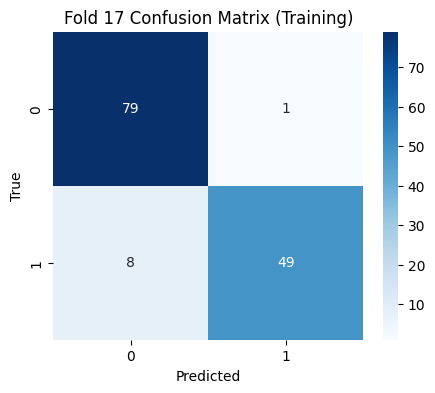


--- Fold 18 ---
Accuracy: 0.9416
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        80
           1       1.00      0.86      0.92        57

    accuracy                           0.94       137
   macro avg       0.95      0.93      0.94       137
weighted avg       0.95      0.94      0.94       137

Confusion Matrix:
 [[80  0]
 [ 8 49]]


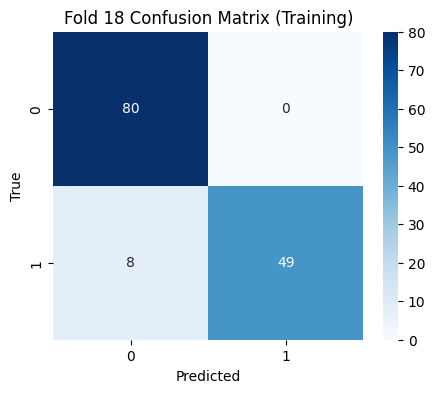


--- Fold 19 ---
Accuracy: 0.9270
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        80
           1       0.98      0.84      0.91        57

    accuracy                           0.93       137
   macro avg       0.94      0.91      0.92       137
weighted avg       0.93      0.93      0.93       137

Confusion Matrix:
 [[79  1]
 [ 9 48]]


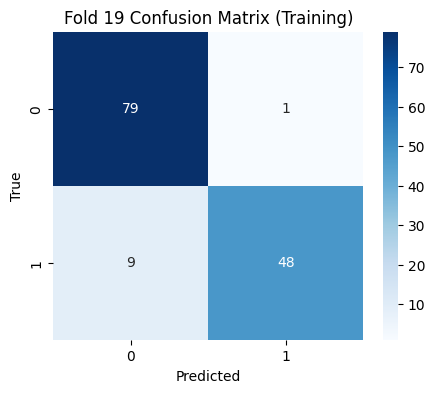


--- Fold 20 ---
Accuracy: 0.9416
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        80
           1       0.95      0.91      0.93        57

    accuracy                           0.94       137
   macro avg       0.94      0.94      0.94       137
weighted avg       0.94      0.94      0.94       137

Confusion Matrix:
 [[77  3]
 [ 5 52]]


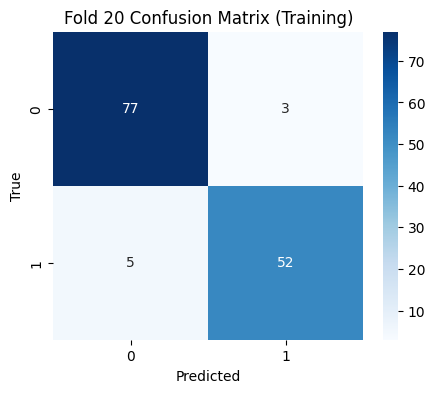


Mean Training Accuracy across folds: 0.9325


In [10]:
skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

fold = 1
train_accuracies = []

print("=== Cross-validation on Training Set ===")
for train_idx, val_idx in skf.split(X_train, y_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    svm = SVC(
        C=3.0, kernel='rbf', gamma='scale',
        probability=True, class_weight='balanced',
        random_state=42
    )
    svm.fit(X_tr, y_tr)
    y_pred_val = svm.predict(X_val)

    acc = accuracy_score(y_val, y_pred_val)
    train_accuracies.append(acc)

    print(f"\n--- Fold {fold} ---")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_val, y_pred_val))
    
    cm = confusion_matrix(y_val, y_pred_val)
    print("Confusion Matrix:\n", cm)

    # رسم Confusion Matrix لكل فولد
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Fold {fold} Confusion Matrix (Training)")
    plt.show()

    fold += 1

print(f"\nMean Training Accuracy across folds: {np.mean(train_accuracies):.4f}")


# 5. Train model

In [11]:
final_svm = SVC(
    C=3.0, kernel='rbf', gamma='scale',
    probability=True, class_weight='balanced',
    random_state=42
)
final_svm.fit(X_train, y_train)


SVC(C=3.0, class_weight='balanced', probability=True, random_state=42)

# 6. Evaluate on Training Set


=== Training Set Full Evaluation ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1612
           1       1.00      1.00      1.00      1129

    accuracy                           1.00      2741
   macro avg       1.00      1.00      1.00      2741
weighted avg       1.00      1.00      1.00      2741

Confusion Matrix:
 [[1612    0]
 [   0 1129]]


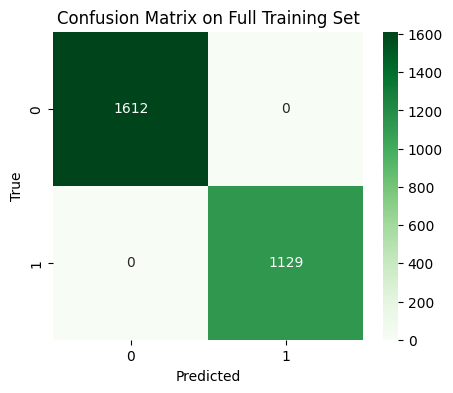

In [12]:
y_train_pred = final_svm.predict(X_train)
print("\n=== Training Set Full Evaluation ===")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", cm_train)

plt.figure(figsize=(5,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix on Full Training Set")
plt.show()

# 7. Evaluate on Test Set


=== Test Set Evaluation ===
Accuracy: 0.9446064139941691
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       404
           1       0.97      0.89      0.93       282

    accuracy                           0.94       686
   macro avg       0.95      0.94      0.94       686
weighted avg       0.95      0.94      0.94       686

Confusion Matrix:
 [[396   8]
 [ 30 252]]


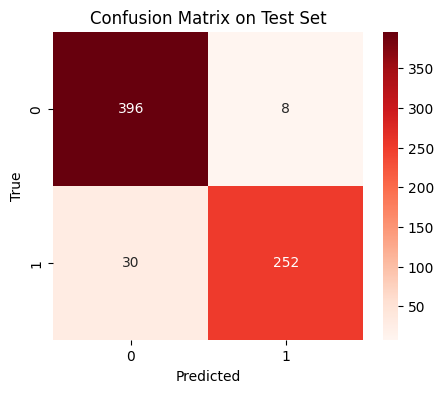

In [13]:
y_test_pred = final_svm.predict(X_test)
print("\n=== Test Set Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm_test)

plt.figure(figsize=(5,4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix on Test Set")
plt.show()